In [91]:
%matplotlib inline

import os
import pandas as pd
import seaborn as sns

DATA_PATH = '../hi-seas-data'

solar_radiation = pd.read_csv(os.path.join(DATA_PATH, 'solar radiation.csv'), 
                              names=["id", "unix_secs", "date", "time", "irradiance", 'txt'])
sunset = pd.read_csv(os.path.join(DATA_PATH, 'sunset.csv'), 
                              names=["id", "unix_secs", "date", "time", "sunset", 'txt'])
sunrise = pd.read_csv(os.path.join(DATA_PATH, 'sunrise.csv'), 
                              names=["id", "unix_secs", "date", "time", "sunrise", 'txt'])
temperature = pd.read_csv(os.path.join(DATA_PATH, 'temperature.csv'), 
                              names=["id", "unix_secs", "date", "time", "temperature", 'txt'])
humidity = pd.read_csv(os.path.join(DATA_PATH, 'humidity.csv'), 
                              names=["id", "unix_secs", "date", "time", "humidity", 'txt'])
wind_dir = pd.read_csv(os.path.join(DATA_PATH, 'wind direction in degrees.csv'), 
                              names=["id", "unix_secs", "date", "time", "direction", 'txt'])
wind_speed = pd.read_csv(os.path.join(DATA_PATH, 'wind speed.csv'), 
                              names=["id", "unix_secs", "date", "time", "speed", 'txt'])
barometric_pressure = pd.read_csv(os.path.join(DATA_PATH, 'wind speed.csv'), 
                              names=["id", "unix_secs", "date", "time", "pressure", 'txt'])


In [63]:
solar_radiation.describe()

,id,unix_secs,irradiance,txt
count,33133.000000,3.313300e+04,33133.000000,0.0
mean,16567.000000,1.478037e+09,207.942670,NaN
std,9564.817571,3.000859e+06,316.615085,NaN
min,1.000000,1.472724e+09,1.110000,NaN
25%,8284.000000,1.475496e+09,1.230000,NaN
50%,16567.000000,1.478009e+09,2.670000,NaN
75%,24850.000000,1.480550e+09,355.770000,NaN
max,33133.000000,1.483265e+09,1601.260000,NaN


In [64]:
sunset.describe()

,id,unix_secs,sunset,txt
count,121.000000,1.210000e+02,121.000000,0.0
mean,61.000000,1.477930e+09,1773.330579,NaN
std,35.073732,3.059108e+06,35.411954,NaN
min,1.000000,1.472724e+09,1742.000000,NaN
25%,31.000000,1.475316e+09,1745.000000,NaN
50%,61.000000,1.477908e+09,1752.000000,NaN
75%,91.000000,1.480586e+09,1811.000000,NaN
max,121.000000,1.483178e+09,1838.000000,NaN


In [65]:
sunrise.describe()

,id,unix_secs,sunrise,txt
count,121.000000,1.210000e+02,121.000000,0.0
mean,61.000000,1.477930e+09,627.388430,NaN
std,35.073732,3.059108e+06,15.676613,NaN
min,1.000000,1.472724e+09,607.000000,NaN
25%,31.000000,1.475316e+09,613.000000,NaN
50%,61.000000,1.477908e+09,623.000000,NaN
75%,91.000000,1.480586e+09,641.000000,NaN
max,121.000000,1.483178e+09,657.000000,NaN


In [66]:
temperature.describe()

,id,unix_secs,temperature,txt
count,33133.000000,3.313300e+04,33133.000000,0.0
mean,16567.000000,1.478037e+09,51.088341,NaN
std,9564.817571,3.000859e+06,6.200181,NaN
min,1.000000,1.472724e+09,34.000000,NaN
25%,8284.000000,1.475496e+09,46.000000,NaN
50%,16567.000000,1.478009e+09,50.000000,NaN
75%,24850.000000,1.480550e+09,55.000000,NaN
max,33133.000000,1.483265e+09,71.000000,NaN


In [67]:
wind_dir.describe()

,id,unix_secs,direction,txt
count,33133.000000,3.313300e+04,33133.000000,0.0
mean,16567.000000,1.478037e+09,143.196205,NaN
std,9564.817571,3.000859e+06,83.073410,NaN
min,1.000000,1.472724e+09,0.090000,NaN
25%,8284.000000,1.475496e+09,81.920000,NaN
50%,16567.000000,1.478009e+09,147.370000,NaN
75%,24850.000000,1.480550e+09,179.120000,NaN
max,33133.000000,1.483265e+09,359.950000,NaN


In [68]:
wind_speed.describe()

,id,unix_secs,speed,txt
count,33133.000000,3.313300e+04,33133.000000,0.0
mean,16567.000000,1.478037e+09,6.260170,NaN
std,9564.817571,3.000859e+06,3.492808,NaN
min,1.000000,1.472724e+09,0.000000,NaN
25%,8284.000000,1.475496e+09,3.370000,NaN
50%,16567.000000,1.478009e+09,5.620000,NaN
75%,24850.000000,1.480550e+09,7.870000,NaN
max,33133.000000,1.483265e+09,40.500000,NaN


In [80]:
# Prepare data 
df = solar_radiation.join( wind_speed['speed'], on='id')
df = df.join(humidity['humidity'], on='id')
df = df.join(temperature['temperature'], on='id')
df = df.join(sunrise['sunrise'], on='id')
df = df.join(sunset['sunset'], on='id')
df = df.join(wind_dir['direction'], on='id')
df = df.join(barometric_pressure['pressure'], on='id')
df = df.drop('txt', 1)

# Get only features
X_feat = df[['irradiance', 'speed', 'humidity', 'temperature', 'sunrise', 'sunset', 'direction', 'pressure']]

In [82]:
X_feat.describe()

,irradiance,speed,humidity,temperature,sunrise,sunset,direction,pressure
count,33133.000000,33132.000000,33132.000000,33132.000000,120.000000,120.000000,33132.000000,33132.000000
mean,207.942670,6.260121,75.022969,51.088434,627.508333,1773.008333,143.195941,6.260121
std,316.615085,3.492849,25.990133,6.200251,15.686528,35.381830,83.074650,3.492849
min,1.110000,0.000000,8.000000,34.000000,607.000000,1742.000000,0.090000,0.000000
25%,1.230000,3.370000,56.000000,46.000000,613.750000,1744.750000,81.917500,3.370000
50%,2.670000,5.620000,85.000000,50.000000,623.500000,1751.500000,147.370000,5.620000
75%,355.770000,7.870000,97.000000,55.000000,641.250000,1810.250000,179.125000,7.870000
max,1601.260000,40.500000,103.000000,71.000000,657.000000,1838.000000,359.950000,40.500000


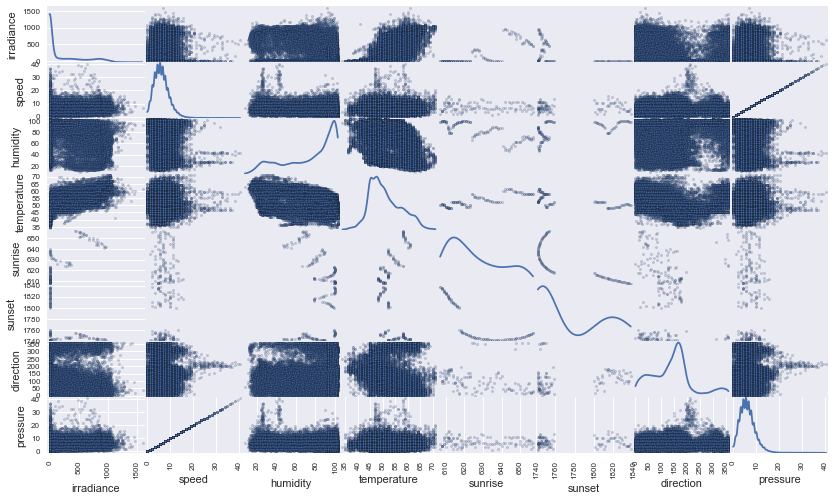

In [93]:
pd.scatter_matrix(X_feat, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [95]:
df[['date', 'time']]

,date,time
0,2016-09-30,23:55:18
1,2016-09-30,23:50:23
2,2016-09-30,23:45:24
3,2016-09-30,23:40:21
4,2016-09-30,23:35:22
5,2016-09-30,23:30:27
6,2016-09-30,23:25:21
7,2016-09-30,23:20:21
8,2016-09-30,23:15:21
9,2016-09-30,23:10:24
